## This notebook will examine the Outdoor Temperature Measurments from the UW ATMS Building 

https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=UWASH&hour1=20&min1=48&timetype=LOCAL&unit=0&graph=0

In [15]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
#import pyproj
#import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

In [16]:
!ls

KSEA.2023-02-06.csv    UWASH.2022-02-12.csv   UWASH.2023-01-31.csv
Outdoor ATMSDATA.ipynb UWASH.2022-10-24.csv   UWASH.2023-02-06.csv


In [17]:
!pwd

/Users/amandaworthy/CS4EVN/UWASH Outdoor Data


In [20]:
UWASH= pd.read_csv("UWASH.2023-02-06.csv", sep=',', header=[10])
UWASH.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,Millimeters
1,UWASH,2020-12-01T12:55:00Z,2.78,100.0,1.54,311.0,2.06,0.0
2,UWASH,2020-12-01T13:55:00Z,3.89,100.0,0.0,344.0,0.0,0.0
3,UWASH,2020-12-01T14:55:00Z,3.89,96.16,0.51,10.0,1.03,0.0
4,UWASH,2020-12-01T15:55:00Z,3.33,100.0,1.03,331.0,1.54,0.0


In [23]:
KSEA= pd.read_csv("KSEA.2023-02-06.csv", sep=',', header=[10])
KSEA.head()

/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_70790/2792009054.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  KSEA= pd.read_csv("KSEA.2023-02-06.csv", sep=',', header=[10])


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,Millimeters,Millimeters,Millimeters,Millimeters
1,KSEA,2020-12-01T12:53:00Z,3.3,85.48,2.57,340.0,NaN,NaN,NaN,NaN,NaN
2,KSEA,2020-12-01T13:53:00Z,4.4,85.6,3.09,30.0,NaN,NaN,NaN,NaN,NaN
3,KSEA,2020-12-01T14:53:00Z,2.8,92.46,4.12,10.0,NaN,NaN,NaN,NaN,NaN
4,KSEA,2020-12-01T15:26:00Z,3.3,93.13,4.12,100.0,NaN,NaN,NaN,NaN,NaN


In [24]:
UWASH= UWASH.drop(['Station_ID'], axis=1)
list(UWASH.columns)


['Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'wind_speed_set_1',
 'wind_direction_set_1',
 'wind_gust_set_1',
 'precip_accum_set_1']

In [25]:
#drop units 
UWASH= UWASH.drop(0,axis=0)
UWASH.head()

UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time)
UWASH['Date_Time']= UWASH['Date_Time']

In [26]:
#convert all to numbers besides the wind, station, date

cols = UWASH.columns.drop(['Date_Time']) #,'wind_cardinal_direction_set_1d'])
#cols = UWASH.columns.drop(['Date_Time'])

UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')

UWASH= UWASH.dropna(axis=1, how='all')
UWASH.head(5)


,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1
1,2020-12-01 12:55:00+00:00,2.78,100.00,1.54,311.0,2.06,0.0
2,2020-12-01 13:55:00+00:00,3.89,100.00,0.00,344.0,0.00,0.0
3,2020-12-01 14:55:00+00:00,3.89,96.16,0.51,10.0,1.03,0.0
4,2020-12-01 15:55:00+00:00,3.33,100.00,1.03,331.0,1.54,0.0
5,2020-12-01 16:55:00+00:00,5.00,92.52,0.00,46.0,0.00,0.0


In [27]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19038 entries, 1 to 19038
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Date_Time                19038 non-null  datetime64[ns, UTC]
 1   air_temp_set_1           19036 non-null  float64            
 2   relative_humidity_set_1  17958 non-null  float64            
 3   wind_speed_set_1         19038 non-null  float64            
 4   wind_direction_set_1     19026 non-null  float64            
 5   wind_gust_set_1          19038 non-null  float64            
 6   precip_accum_set_1       9798 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1.0 MB


In [28]:
UWASH= UWASH.rename(columns= {"Date_Time": "Timestamp", 'air_temp_set_1': "outdoor_air_temp_C", 'relative_humidity_set_1': "outdoor_relative_humidity_%", 'wind_chill_set_1d': "outdoor_wind_chill_C", 'heat_index_set_1d': "heat_index_C", "wind_speed_set_1": "outdoor_wind_speed_mpers", 
                             "wind_direction_set_1": "outdoor_wind_direction_deg", "wind_gust_set_1": "Outdoor_wind_gust_mpers","precip_accum_set_1" : "precip_accum_mm","sea_level_pressure_set_1": "sea_level_pressure_pascals", "dew_point_temperature_set_1d": "dew_point_temperature_C",  "wind_cardinal_direction_set_1d": "wind_cardinal_direction"   })

UWASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19038 entries, 1 to 19038
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Timestamp                    19038 non-null  datetime64[ns, UTC]
 1   outdoor_air_temp_C           19036 non-null  float64            
 2   outdoor_relative_humidity_%  17958 non-null  float64            
 3   outdoor_wind_speed_mpers     19038 non-null  float64            
 4   outdoor_wind_direction_deg   19026 non-null  float64            
 5   Outdoor_wind_gust_mpers      19038 non-null  float64            
 6   precip_accum_mm              9798 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1.0 MB


In [29]:
#remove timezone bc excel doesnt like that 

#UWASH['Date_Time']= UWASH['Date_Time'].dt.tz_localize(None)

In [12]:
#uncomment out when want to minipulate data 

#UWASH.to_csv('UWASH_cleaned_2023-01-31.csv', index=False)

with pd.ExcelWriter("UWASH_new_sheet_per_yr.xlsx") as writer:
    for date, data in UWASH.groupby(UWASH['Date_Time'].dt.strftime('%Y')):
        data.to_excel(writer, sheet_name = date.replace('/', '_'), index=False)

In [13]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19038 entries, 1 to 19038
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Timestamp                    19038 non-null  datetime64[ns, UTC]
 1   outdoor_air_temp_C           19036 non-null  float64            
 2   outdoor_relative_humidity_%  17958 non-null  float64            
 3   outdoor_wind_speed_mpers     19038 non-null  float64            
 4   outdoor_wind_direction_deg   19026 non-null  float64            
 5   Outdoor_wind_gust_mpers      19038 non-null  float64            
 6   precip_accum_mm              9798 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1.0 MB


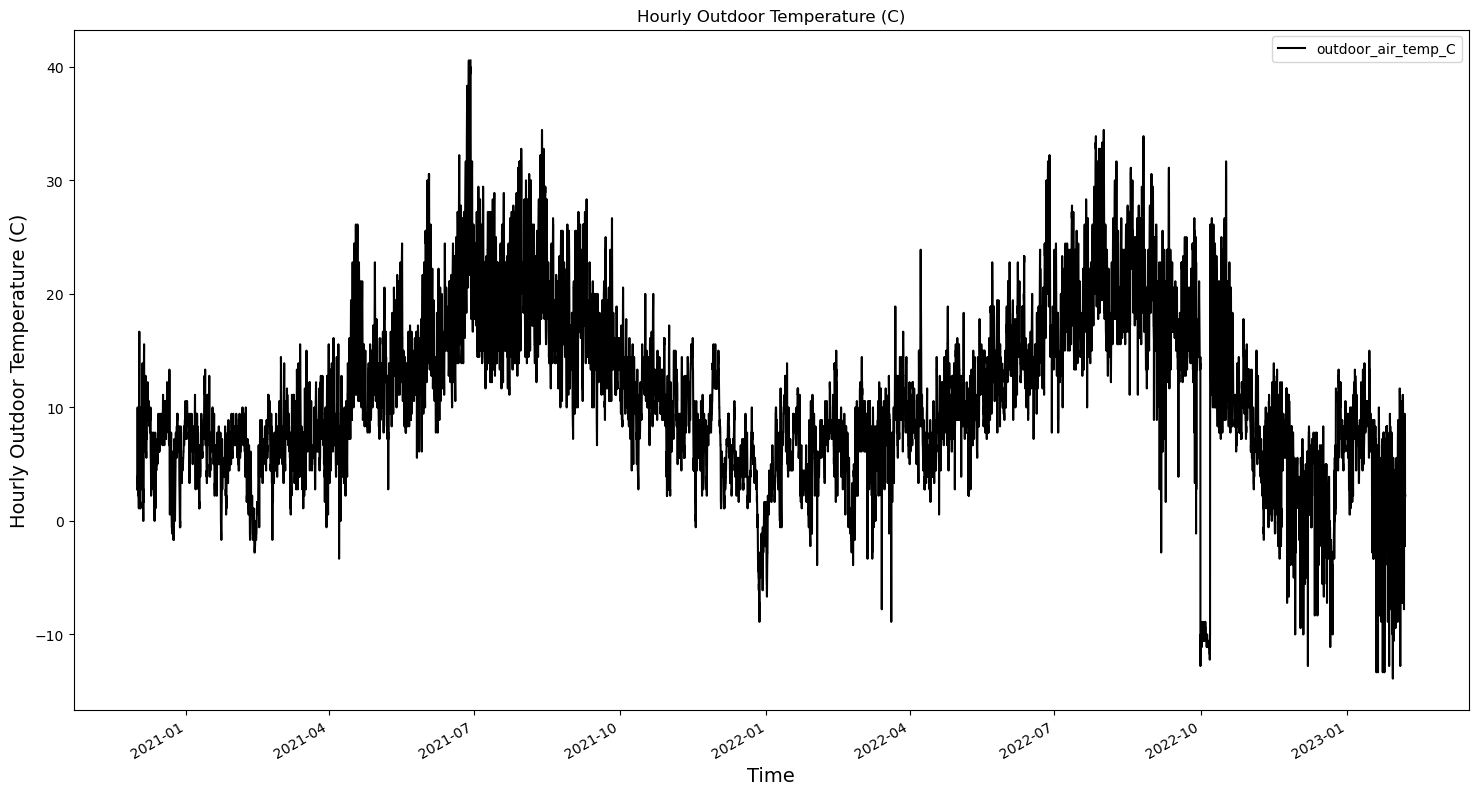

In [14]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Outdoor Temperature (C)')

UWASH.plot(x='Timestamp', y='outdoor_air_temp_C',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Outdoor Temperature (C)",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();